# Human Value and Comment Topic Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

## General Topic Distribution

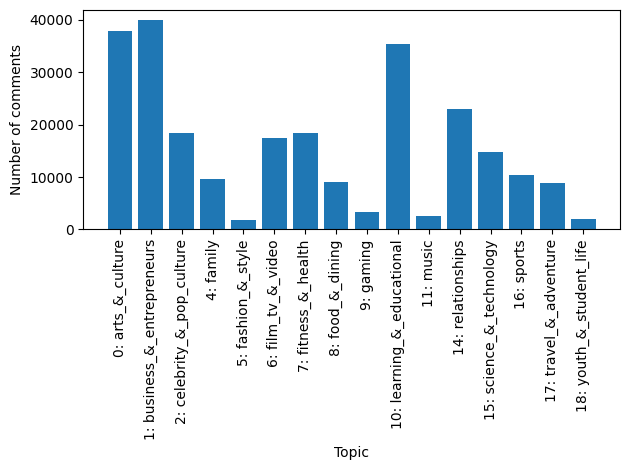

In [2]:
all_topic_scores_raw = np.load("all_scores.npy")
all_topic_scores = np.empty((all_topic_scores_raw.shape[0], 16))
topic_counts = [0 for _ in range(16)]
topic_labels = ['0: arts_&_culture', '1: business_&_entrepreneurs', '2: celebrity_&_pop_culture',
          '4: family', '5: fashion_&_style',
          '6: film_tv_&_video', '7: fitness_&_health', '8: food_&_dining',
          '9: gaming', '10: learning_&_educational', '11: music',
          '14: relationships',
          '15: science_&_technology', '16: sports', '17: travel_&_adventure',
          '18: youth_&_student_life']

for score_idx, raw_score in enumerate(all_topic_scores_raw):
    score = np.exp(raw_score)/sum(np.exp(raw_score))
    score = np.delete(score, [3, 12, 13])
    all_topic_scores[score_idx] = score
    topic_counts[np.argmax(score)] += 1

plt.bar(topic_labels, topic_counts)
plt.xticks(rotation=90)
plt.xlabel('Topic')
plt.ylabel('Number of comments')
plt.tight_layout()
plt.show()

## Topic Distribution per Human Value

In [3]:
DATA_PATH = "data"

def get_value_labels(path=DATA_PATH):
    def get_path(set_type, is_args):
        return os.path.join(path, set_type, ("arguments" if is_args else "labels") + "-" + set_type + ".tsv")
    
    for set_type in ["test", "training", "validation"]:
        args = pd.read_csv(get_path(set_type, True), sep="\t")
        
        labels = pd.read_csv(get_path(set_type, False), sep="\t")
        labels = labels.drop("Argument ID", axis=1)
        args["Labels"] = [x for x in labels.to_numpy()]
        
    classes = list(labels.columns)
    
    return np.array(classes)

value_labels = get_value_labels()

In [4]:
all_values_raw = np.load("all_values_correct.npy")
value_predictions = []

for idx, raw_score in enumerate(all_values_raw):
  score = expit(raw_score)
  predictions = (score >= 0.5) * 1
  predicted_values = np.argwhere(predictions).flatten().tolist()
  value_predictions.append(predicted_values)

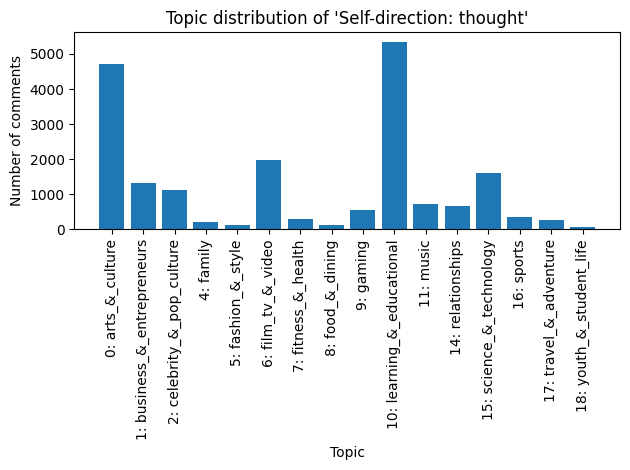

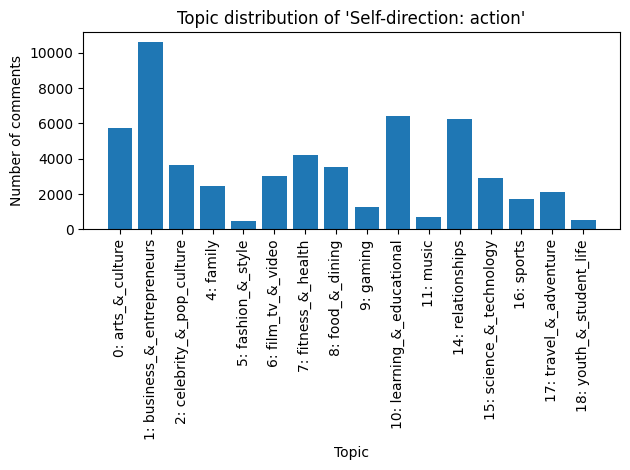

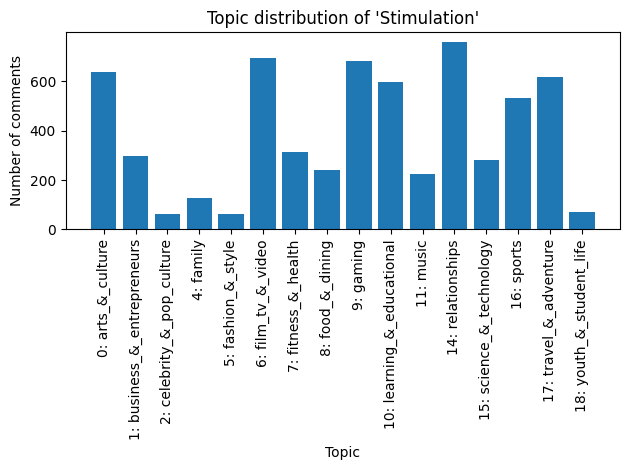

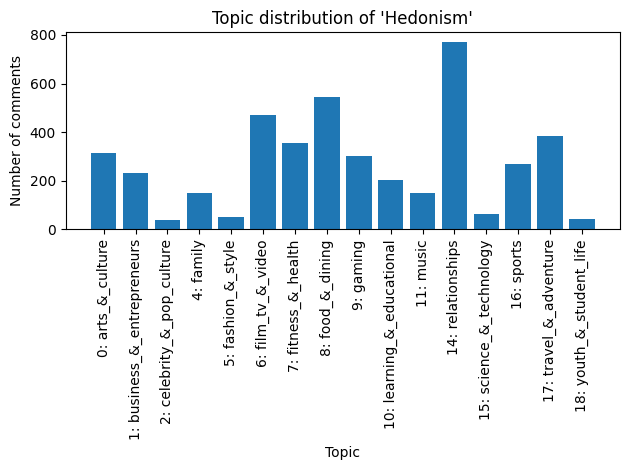

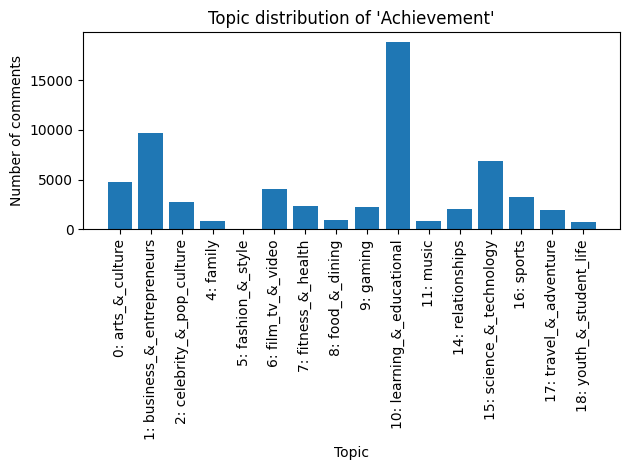

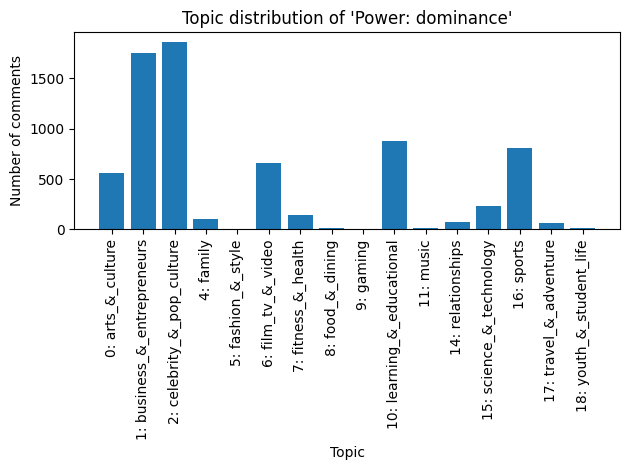

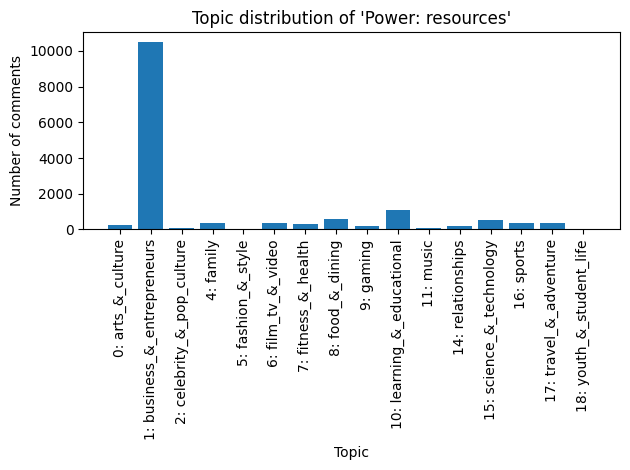

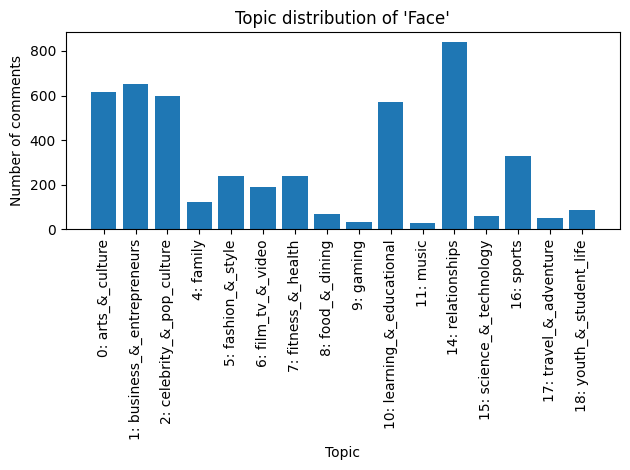

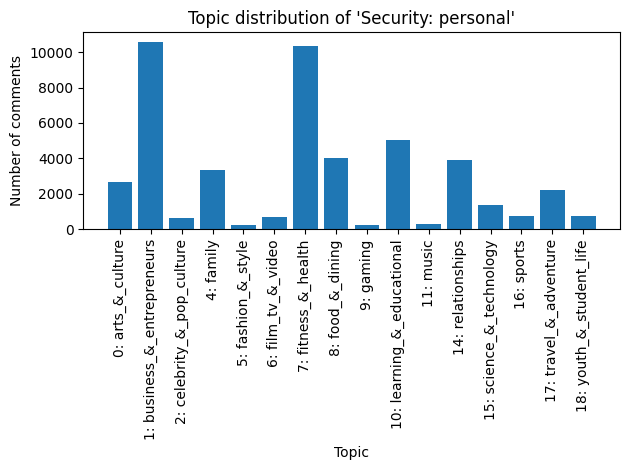

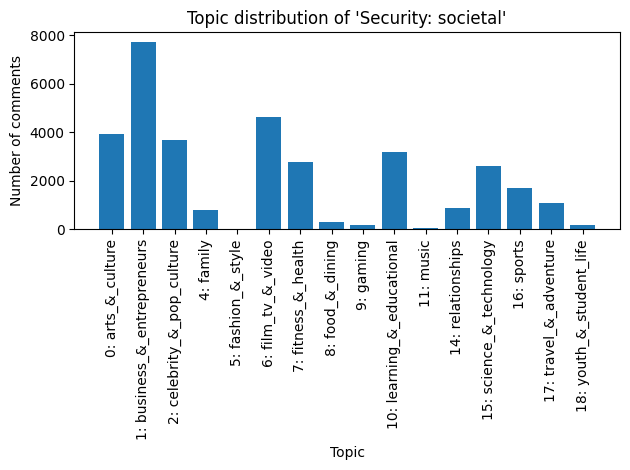

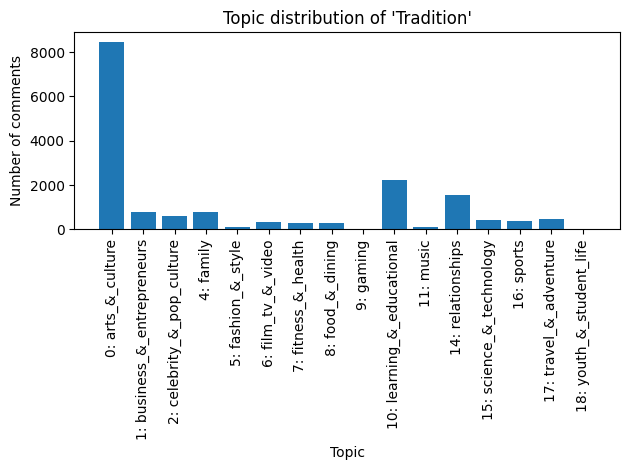

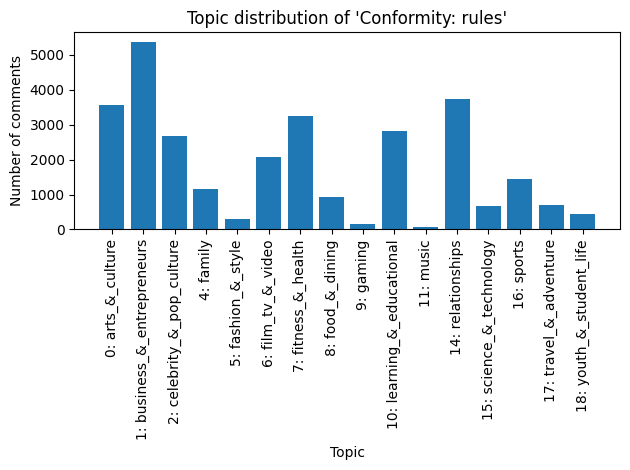

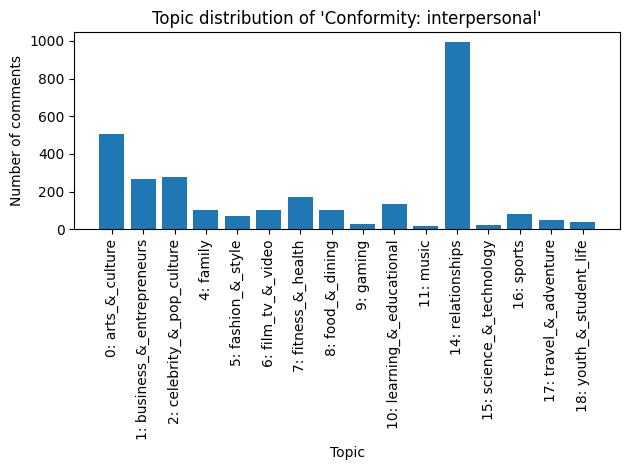

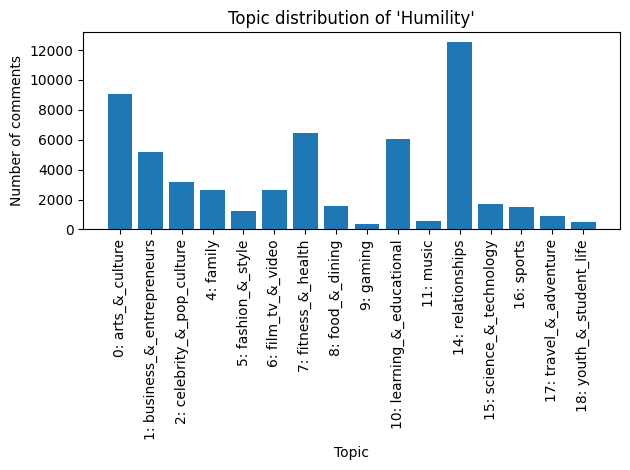

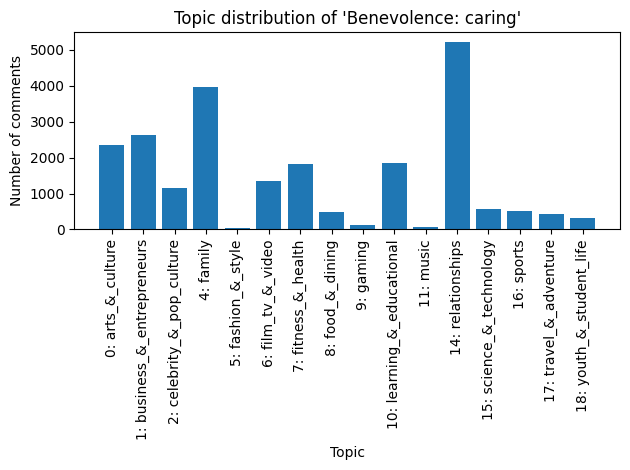

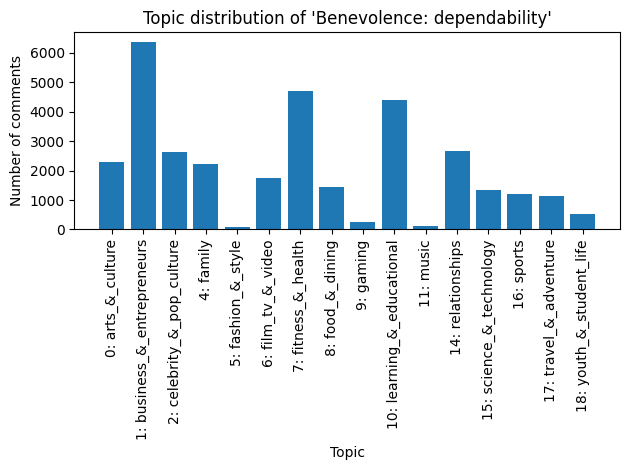

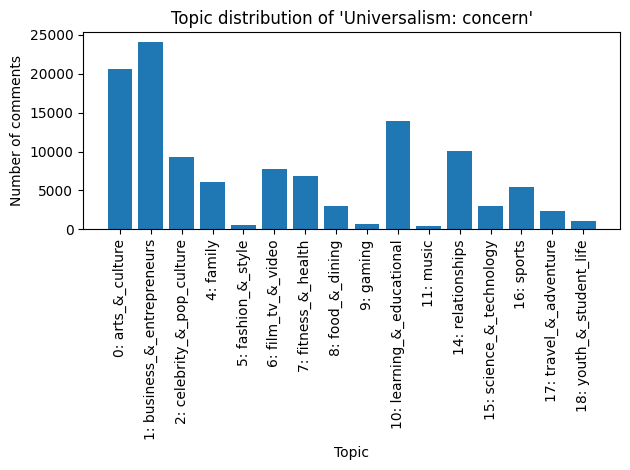

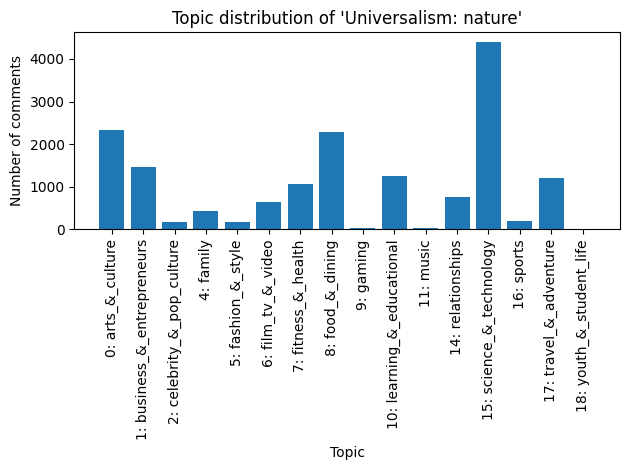

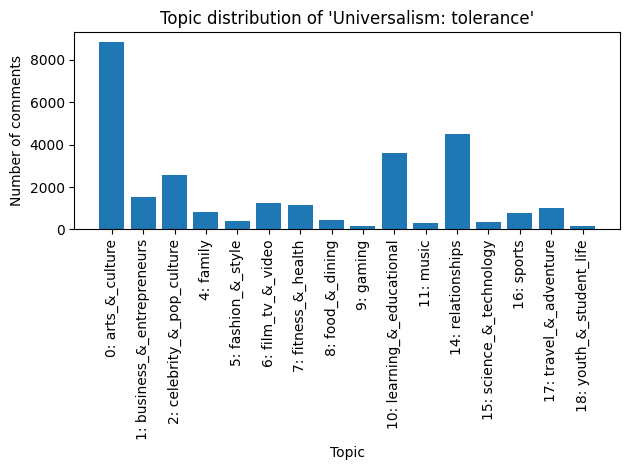

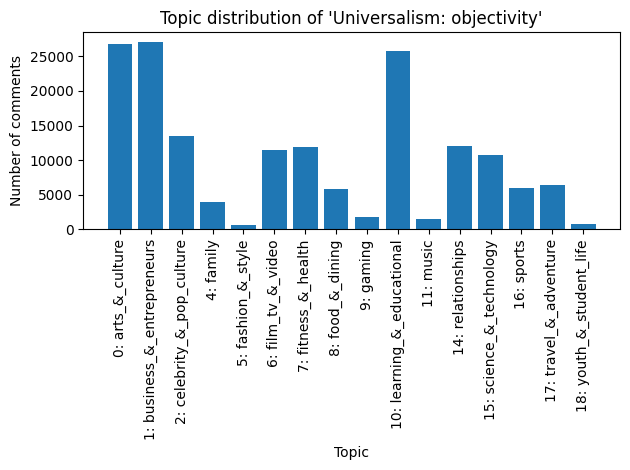

In [5]:
count_topic_per_value = np.zeros((len(value_labels), len(topic_labels)))
for comment_idx in range(len(value_predictions)):
    for value in value_predictions[comment_idx]:
        topic = np.argmax(all_topic_scores[comment_idx])
        count_topic_per_value[value][topic] += 1

for value_idx, value in enumerate(value_labels):
    plt.bar(topic_labels, count_topic_per_value[value_idx])
    plt.xlabel("Topic")
    plt.ylabel("Number of comments")
    plt.title(f"Topic distribution of \'{value}\'")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()